## MMSB: Simulations

In [1]:
from IPython.core.debugger import Tracer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb

%matplotlib inline
matplotlib.style.use('ggplot')
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [62]:
def update_ptype_counts(gamma):
    ptypes = pd.DataFrame(gamma).idxmax()
    for q in xrange(V):
        C[q,q] += 1
        for p in xrange(q):
            if ptypes[q] == ptypes[p]:
                C[p,q] += 1

In [58]:
def expected_co_occurence(pi):
    D = np.eye(V)
    for q in xrange(V):
        for p in xrange(q):
            D[p,q] = sum(pi[p] * pi[q])
    return D

# Simulation I
## K=3, V=9, N=5000

In [63]:
K = 3
V = 9
N = 5000

B_ = np.zeros((K,K))
B_[0,1] = .2
B_[0,2] = .2
B_[1,2] = .2
finish_B(B_)

X, pi = gen_data(B_, V, N)

In [77]:
C = np.eye(V)
n_iter = 50
for _ in xrange(n_iter):
    gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, 600)
    update_ptype_counts(gamma)

Runtime: 0:00:04.151612
Runtime: 0:00:04.123442
Runtime: 0:00:04.102005
Runtime: 0:00:04.113820
Runtime: 0:00:04.129645
Runtime: 0:00:04.118406
Runtime: 0:00:04.106926
Runtime: 0:00:04.110310
Runtime: 0:00:04.119764
Runtime: 0:00:04.112552
Runtime: 0:00:04.102381
Runtime: 0:00:04.124470
Runtime: 0:00:04.114432
Runtime: 0:00:04.212407
Runtime: 0:00:04.143535
Runtime: 0:00:04.131317
Runtime: 0:00:04.139229
Runtime: 0:00:04.124715
Runtime: 0:00:04.119438
Runtime: 0:00:04.136160
Runtime: 0:00:04.125076
Runtime: 0:00:04.119153
Runtime: 0:00:04.188345
Runtime: 0:00:04.130547
Runtime: 0:00:04.349155
Runtime: 0:00:04.331169
Runtime: 0:00:04.408247
Runtime: 0:00:04.197926
Runtime: 0:00:04.294516
Runtime: 0:00:04.458842
Runtime: 0:00:04.377189
Runtime: 0:00:04.251072
Runtime: 0:00:04.117879
Runtime: 0:00:04.116151
Runtime: 0:00:04.131869
Runtime: 0:00:04.120261
Runtime: 0:00:04.112479
Runtime: 0:00:04.149872
Runtime: 0:00:04.174446
Runtime: 0:00:04.108616
Runtime: 0:00:04.121645
Runtime: 0:00:04

## Co-occurences

In [78]:
pd.DataFrame(C / C[0,0]).round(2)

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.82,0.00,0.78,0.73,0.18,0.02,0.90
1,0.0,1.0,0.02,0.94,0.00,0.00,0.02,0.88,0.00
2,0.0,0.0,1.00,0.02,0.82,0.80,0.29,0.00,0.82
3,0.0,0.0,0.00,1.00,0.00,0.00,0.02,0.88,0.00
4,0.0,0.0,0.00,0.00,1.00,0.80,0.37,0.02,0.82
5,0.0,0.0,0.00,0.00,0.00,1.00,0.39,0.02,0.76
6,0.0,0.0,0.00,0.00,0.00,0.00,1.00,0.06,0.25
7,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.02
8,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [100]:
pd.DataFrame(expected_co_occurence(pi)).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.04,0.55,0.14,0.17,0.24,0.32,0.14,0.31,0.28,0.11,0.13,0.00,0.55,0.19,0.34,0.26,0.08,0.10,0.34
1,0.0,1.00,0.07,0.03,0.01,0.17,0.02,0.37,0.05,0.01,0.17,0.25,0.03,0.08,0.08,0.12,0.14,0.46,0.23,0.03
2,0.0,0.00,1.00,0.13,0.10,0.02,0.12,0.25,0.52,0.00,0.02,0.13,0.00,0.92,0.15,0.32,0.07,0.02,0.03,0.44
3,0.0,0.00,0.00,1.00,0.11,0.18,0.21,0.27,0.36,0.22,0.01,0.14,0.63,0.14,0.03,0.19,0.21,0.02,0.10,0.08
4,0.0,0.00,0.00,0.00,1.00,0.06,0.08,0.07,0.10,0.08,0.58,0.33,0.12,0.09,0.57,0.07,0.06,0.30,0.44,0.40
5,0.0,0.00,0.00,0.00,0.00,1.00,0.69,0.07,0.01,0.78,0.04,0.05,0.00,0.03,0.02,0.44,0.62,0.16,0.07,0.05
6,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.03,0.06,0.84,0.02,0.02,0.00,0.12,0.04,0.48,0.65,0.08,0.04,0.11
7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.30,0.00,0.07,0.21,0.37,0.25,0.07,0.14,0.09,0.20,0.15,0.12
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.16,0.45,0.52,0.08,0.20,0.06,0.01,0.07,0.25
9,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.03,0.01,0.00,0.01,0.02,0.50,0.73,0.09,0.04,0.06


In [80]:
pd.DataFrame(C / C[0,0] - expected_co_occurence(pi)).round(2)

,0,1,2,3,4,5,6,7,8
0,0.0,-0.03,0.26,-0.04,0.10,0.24,0.10,-0.06,0.10
1,0.0,0.00,0.00,0.01,-0.22,-0.03,-0.01,-0.03,-0.03
2,0.0,0.00,0.00,-0.00,0.37,0.31,-0.11,-0.04,0.26
3,0.0,0.00,0.00,0.00,-0.22,-0.03,-0.02,-0.02,-0.04
4,0.0,0.00,0.00,0.00,0.00,0.41,0.36,-0.24,0.13
5,0.0,0.00,0.00,0.00,0.00,0.00,-0.09,-0.02,0.28
6,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.18
7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.06
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## ELBO plot

(-3011.9502632408421, -3011.9502632408421)

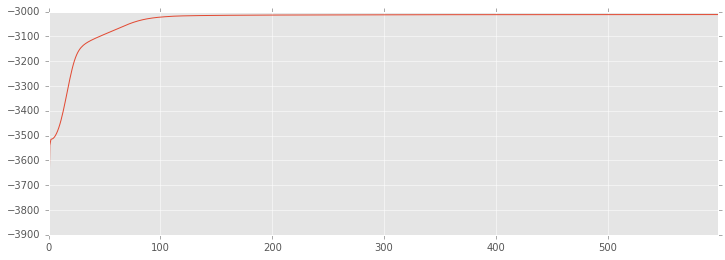

In [81]:
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

# B (interaction probabilities)

In [82]:
pd.DataFrame(B).round(6)

,0,1,2
0,0.500000,0.787135,0.734834
1,0.212865,0.500000,0.203444
2,0.265166,0.796556,0.500000


# Pi (prototype distributions)

In [84]:
gamma_nrm = gamma
gamma_nrm /= gamma_nrm.sum(axis=0)
gamma_df = pd.DataFrame(gamma_nrm)

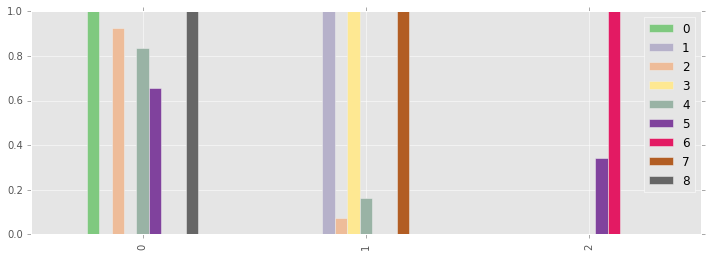

In [85]:
gamma_df.plot(kind='bar', cmap='Accent', figsize=[12,4])

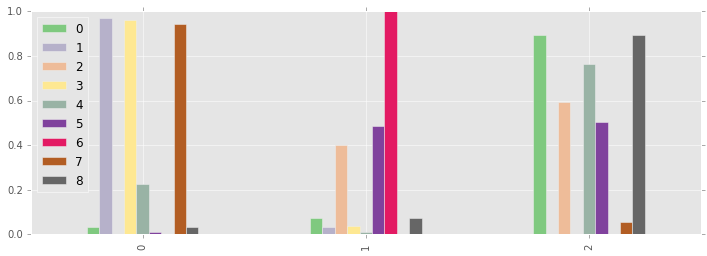

In [86]:
pd.DataFrame(pi).T.plot(kind='bar', cmap='Accent', figsize=[12,4])

# Simulation II
## K=5, V=20, N=5000

In [87]:
K = 5
V = 20
N = 5000

B_ = np.zeros((K,K))
B_[0,1] = .2
B_[0,2] = .2
B_[0,3] = .2
B_[0,4] = .2
B_[1,2] = .2
B_[1,3] = .2
B_[1,4] = .2
B_[2,3] = .2
B_[2,4] = .2
B_[3,4] = .2
finish_B(B_)

X, pi = gen_data(B_, V, N)

In [88]:
C = np.eye(V)
n_iter = 25
for _ in xrange(n_iter):
    gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, 500)
    update_ptype_counts(gamma)

Runtime: 0:00:07.106120
Runtime: 0:00:06.960839
Runtime: 0:00:06.990681
Runtime: 0:00:07.045707
Runtime: 0:00:07.021205
Runtime: 0:00:06.967846
Runtime: 0:00:06.961288
Runtime: 0:00:06.973723
Runtime: 0:00:06.995767
Runtime: 0:00:07.449362
Runtime: 0:00:07.556289
Runtime: 0:00:07.364569
Runtime: 0:00:07.192296
Runtime: 0:00:07.297640
Runtime: 0:00:07.076200
Runtime: 0:00:07.100687
Runtime: 0:00:07.141871
Runtime: 0:00:07.008086
Runtime: 0:00:07.030394
Runtime: 0:00:07.385513
Runtime: 0:00:07.027784
Runtime: 0:00:07.274578
Runtime: 0:00:07.148179
Runtime: 0:00:07.205878
Runtime: 0:00:07.276407


## Co-occurences

In [89]:
pd.DataFrame(C / C[0,0]).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.04,0.46,0.42,0.27,0.08,0.12,0.23,0.27,0.08,0.35,0.42,0.08,0.50,0.42,0.12,0.12,0.08,0.19,0.50
1,0.0,1.00,0.00,0.00,0.00,0.65,0.27,0.19,0.00,0.35,0.04,0.00,0.00,0.08,0.00,0.35,0.46,0.65,0.12,0.04
2,0.0,0.00,1.00,0.31,0.19,0.04,0.31,0.27,0.27,0.23,0.31,0.38,0.08,0.35,0.19,0.27,0.12,0.08,0.23,0.38
3,0.0,0.00,0.00,1.00,0.50,0.00,0.00,0.23,0.54,0.00,0.27,0.42,0.38,0.19,0.58,0.00,0.00,0.00,0.42,0.62
4,0.0,0.00,0.00,0.00,1.00,0.00,0.04,0.19,0.62,0.04,0.38,0.42,0.31,0.12,0.50,0.00,0.00,0.04,0.27,0.46
5,0.0,0.00,0.00,0.00,0.00,1.00,0.35,0.12,0.00,0.35,0.04,0.00,0.00,0.08,0.00,0.46,0.58,0.58,0.12,0.04
6,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.08,0.04,0.65,0.04,0.04,0.00,0.15,0.00,0.85,0.62,0.38,0.19,0.04
7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.38,0.15,0.46,0.19,0.08,0.15,0.31,0.08,0.12,0.31,0.38,0.27
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.46,0.42,0.27,0.19,0.46,0.00,0.00,0.04,0.42,0.46
9,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.08,0.00,0.23,0.04,0.62,0.62,0.23,0.15,0.08


In [90]:
pd.DataFrame(expected_co_occurence(pi)).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.04,0.55,0.14,0.17,0.24,0.32,0.14,0.31,0.28,0.11,0.13,0.00,0.55,0.19,0.34,0.26,0.08,0.10,0.34
1,0.0,1.00,0.07,0.03,0.01,0.17,0.02,0.37,0.05,0.01,0.17,0.25,0.03,0.08,0.08,0.12,0.14,0.46,0.23,0.03
2,0.0,0.00,1.00,0.13,0.10,0.02,0.12,0.25,0.52,0.00,0.02,0.13,0.00,0.92,0.15,0.32,0.07,0.02,0.03,0.44
3,0.0,0.00,0.00,1.00,0.11,0.18,0.21,0.27,0.36,0.22,0.01,0.14,0.63,0.14,0.03,0.19,0.21,0.02,0.10,0.08
4,0.0,0.00,0.00,0.00,1.00,0.06,0.08,0.07,0.10,0.08,0.58,0.33,0.12,0.09,0.57,0.07,0.06,0.30,0.44,0.40
5,0.0,0.00,0.00,0.00,0.00,1.00,0.69,0.07,0.01,0.78,0.04,0.05,0.00,0.03,0.02,0.44,0.62,0.16,0.07,0.05
6,0.0,0.00,0.00,0.00,0.00,0.00,1.00,0.03,0.06,0.84,0.02,0.02,0.00,0.12,0.04,0.48,0.65,0.08,0.04,0.11
7,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.30,0.00,0.07,0.21,0.37,0.25,0.07,0.14,0.09,0.20,0.15,0.12
8,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.16,0.45,0.52,0.08,0.20,0.06,0.01,0.07,0.25
9,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.03,0.01,0.00,0.01,0.02,0.50,0.73,0.09,0.04,0.06


In [91]:
pd.DataFrame(C / C[0,0] - expected_co_occurence(pi)).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,-0.09,0.28,0.10,-0.17,-0.20,0.09,-0.04,-0.21,0.23,0.30,0.08,-0.05,0.23,-0.22,-0.14,-0.01,0.09,0.16
1,0.0,0.0,-0.07,-0.03,-0.01,0.49,0.25,-0.17,-0.05,0.33,-0.13,-0.25,-0.03,-0.00,-0.08,0.23,0.32,0.20,-0.11,0.01
2,0.0,0.0,0.00,0.17,0.09,0.01,0.19,0.02,-0.25,0.23,0.29,0.26,0.07,-0.58,0.04,-0.05,0.04,0.06,0.20,-0.05
3,0.0,0.0,0.00,0.00,0.39,-0.18,-0.21,-0.03,0.18,-0.22,0.26,0.28,-0.24,0.06,0.55,-0.19,-0.21,-0.02,0.33,0.53
4,0.0,0.0,0.00,0.00,0.00,-0.06,-0.05,0.12,0.51,-0.04,-0.20,0.09,0.19,0.03,-0.07,-0.07,-0.06,-0.26,-0.17,0.06
5,0.0,0.0,0.00,0.00,0.00,0.00,-0.34,0.04,-0.01,-0.44,-0.00,-0.05,-0.00,0.04,-0.02,0.02,-0.05,0.42,0.05,-0.01
6,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.05,-0.03,-0.19,0.01,0.02,-0.00,0.03,-0.04,0.36,-0.03,0.31,0.15,-0.07
7,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.15,0.39,-0.01,-0.29,-0.10,0.24,-0.06,0.03,0.11,0.24,0.15
8,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.46,0.27,-0.18,-0.33,0.38,-0.20,-0.06,0.03,0.35,0.22
9,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,0.07,-0.00,0.22,0.02,0.11,-0.11,0.14,0.11,0.02


## ELBO plot

(-3346.5993141724375, -3352.7019812078647)

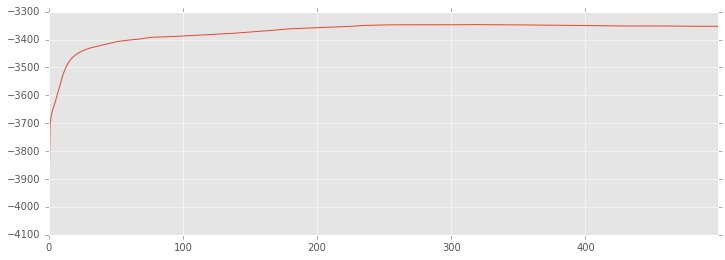

In [92]:
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

# B (interaction probabilities)

In [93]:
pd.DataFrame(B).round(3)

,0,1,2,3,4
0,0.500000,0.313736,0.308487,0.180081,0.142767
1,0.686264,0.500000,0.735967,0.368872,0.289332
2,0.691513,0.264033,0.500000,0.069089,0.153145
3,0.819919,0.631128,0.930911,0.500000,0.253672
4,0.857233,0.710668,0.846855,0.746328,0.500000
